In [55]:
from sklearn.preprocessing import StandardScaler 
import numpy as np


sample = np.random.RandomState(1)

X = np.dot(sample.rand(2,2),sample.rand(2,200)).T

In [56]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

相関係数:0.838


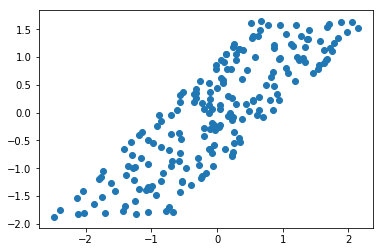

In [57]:
import scipy as sp
import matplotlib.pyplot as plt 

print('相関係数:{:.3f}'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

<h2>主成分分析の実行</h2>

＜目的＞　次元を減らす

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
#新しく得られた軸の向きを表示する
print(pca.components_)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [60]:
#各主成分の分散
print(pca.explained_variance_)

[1.84754124 0.16250901]


In [53]:
#各主成分の分散の割合
print(pca.explained_variance_ratio_)

[0.91915177 0.08084823]


(-2.7171199524743166,
 2.3797679076112566,
 -2.073788617355057,
 1.8417897661036644)

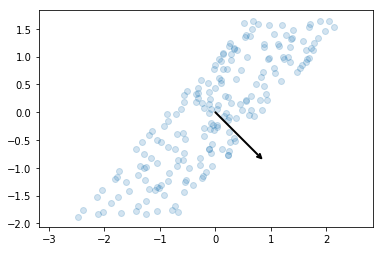

In [54]:
#図示するためのパラメータ設定
arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)

#矢印を書くための関数
def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)
    
#元データのプロット
plt.scatter(X_std[:,0],X_std[:,1],alpha=0.2)

#主成分分析の2軸を矢印で表示
for length, vector in zip(pca.explained_variance_ , pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_ ,pca.mean_ + v)

plt.axis('equal')